In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
train_dir = 'flower-data/train/'
valid_dir = 'flower-data/val/'
test_dir = 'flower-data/test/'

In [4]:
batch_size = 32
img_sz = 224
channels = 3

In [6]:
datagenerator = ImageDataGenerator(
    rescale=1./255,

)

train_gen = datagenerator.flow_from_directory(
    directory=train_dir,
    target_size=(img_sz,img_sz),
    batch_size=batch_size,
    class_mode='categorical',
)
valid_gen = datagenerator.flow_from_directory(
    directory=valid_dir,
    target_size=(img_sz,img_sz),
    batch_size=batch_size,
    class_mode='categorical',
)

Found 45492 images belonging to 104 classes.
Found 12157 images belonging to 104 classes.


In [7]:
train_gen.class_indices.keys()

dict_keys(['alpine sea holly', 'anthurium', 'artichoke', 'azalea', 'balloon flower', 'barberton daisy', 'bee balm', 'bird of paradise', 'bishop of llandaff', 'black-eyed susan', 'blackberry lily', 'blanket flower', 'bolero deep blue', 'bougainvillea', 'bromelia', 'buttercup', 'californian poppy', 'camellia', 'canna lily', 'canterbury bells', 'cape flower', 'carnation', 'cautleya spicata', 'clematis', 'colt foot', 'columbine', 'common dandelion', 'common tulip', 'corn poppy', 'cosmos', 'cyclamen', 'daffodil', 'daisy', 'desert-rose', 'fire lily', 'foxglove', 'frangipani', 'fritillary', 'garden phlox', 'gaura', 'gazania', 'geranium', 'giant white arum lily', 'globe thistle', 'globe-flower', 'grape hyacinth', 'great masterwort', 'hard-leaved pocket orchid', 'hibiscus', 'hippeastrum', 'iris', 'japanese anemone', 'king protea', 'lenten rose', 'lilac hibiscus', 'lotus', 'love in the mist', 'magnolia', 'mallow', 'marigold', 'mexican petunia', 'monkshood', 'moon orchid', 'morning glory', 'orang

In [8]:
num_of_classes = len(os.listdir(train_dir))
print(num_of_classes)
class_names = list(train_gen.class_indices.keys())
print(class_names)

104
['alpine sea holly', 'anthurium', 'artichoke', 'azalea', 'balloon flower', 'barberton daisy', 'bee balm', 'bird of paradise', 'bishop of llandaff', 'black-eyed susan', 'blackberry lily', 'blanket flower', 'bolero deep blue', 'bougainvillea', 'bromelia', 'buttercup', 'californian poppy', 'camellia', 'canna lily', 'canterbury bells', 'cape flower', 'carnation', 'cautleya spicata', 'clematis', 'colt foot', 'columbine', 'common dandelion', 'common tulip', 'corn poppy', 'cosmos', 'cyclamen', 'daffodil', 'daisy', 'desert-rose', 'fire lily', 'foxglove', 'frangipani', 'fritillary', 'garden phlox', 'gaura', 'gazania', 'geranium', 'giant white arum lily', 'globe thistle', 'globe-flower', 'grape hyacinth', 'great masterwort', 'hard-leaved pocket orchid', 'hibiscus', 'hippeastrum', 'iris', 'japanese anemone', 'king protea', 'lenten rose', 'lilac hibiscus', 'lotus', 'love in the mist', 'magnolia', 'mallow', 'marigold', 'mexican petunia', 'monkshood', 'moon orchid', 'morning glory', 'orange dahl

In [9]:
count=0
for image_batch, label_batch in train_gen:
    print(image_batch[0])
    break

[[[0.9843138  1.         1.        ]
  [0.9843138  1.         1.        ]
  [0.9843138  1.         1.        ]
  ...
  [0.7058824  0.77647066 0.86274517]
  [0.6784314  0.7490196  0.8352942 ]
  [0.654902   0.7254902  0.8117648 ]]

 [[0.9843138  1.         1.        ]
  [0.9843138  1.         1.        ]
  [0.9843138  1.         1.        ]
  ...
  [0.7137255  0.7843138  0.8705883 ]
  [0.68235296 0.75294125 0.83921576]
  [0.65882355 0.7294118  0.81568635]]

 [[0.9843138  1.         1.        ]
  [0.9843138  1.         1.        ]
  [0.9843138  1.         1.        ]
  ...
  [0.72156864 0.79215693 0.87843144]
  [0.6862745  0.7568628  0.8431373 ]
  [0.6627451  0.73333335 0.8196079 ]]

 ...

 [[0.00784314 0.09803922 0.        ]
  [0.07843138 0.16862746 0.06666667]
  [0.10980393 0.20000002 0.09803922]
  ...
  [0.01568628 0.07450981 0.        ]
  [0.01960784 0.07843138 0.00392157]
  [0.08627451 0.14509805 0.07058824]]

 [[0.         0.07450981 0.        ]
  [0.07450981 0.16470589 0.0627451 ]


In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=.001)
epochs = 5
checkpoint =tf.keras.callbacks.ModelCheckpoint(f'model{epochs}epochsdrop.h5',
                                               monitor='val_loss',
                                               mode='min',
                                               verbose=1)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                             min_delta=0,
                                             patience=50,
                                             verbose=1,)

callbacks = [checkpoint,earlystop]

In [22]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_sz,img_sz, 3)),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Dropout(.2),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_of_classes, activation='softmax')
])

In [23]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 64)      

In [25]:

history = model.fit(
    train_gen,
    validation_data = valid_gen,
    epochs=epochs,
    steps_per_epoch = train_gen.samples//batch_size,
    validation_steps = valid_gen.samples//batch_size,
    callbacks=callbacks
)

Epoch 1/5
1421/1421 [==============================] - ETA: 0s - loss: 2.3741 - accuracy: 0.4100
Epoch 1: saving model to model5epochsdrop.h5
1421/1421 [==============================] - 1094s 769ms/step - loss: 2.3741 - accuracy: 0.4100 - val_loss: 3.2749 - val_accuracy: 0.3149
Epoch 2/5
1421/1421 [==============================] - ETA: 0s - loss: 0.3184 - accuracy: 0.9136
Epoch 2: saving model to model5epochsdrop.h5
1421/1421 [==============================] - 1094s 770ms/step - loss: 0.3184 - accuracy: 0.9136 - val_loss: 5.5094 - val_accuracy: 0.3068
Epoch 3/5
1421/1421 [==============================] - ETA: 0s - loss: 0.0977 - accuracy: 0.9709
Epoch 3: saving model to model5epochsdrop.h5
1421/1421 [==============================] - 1051s 740ms/step - loss: 0.0977 - accuracy: 0.9709 - val_loss: 6.4531 - val_accuracy: 0.2860
Epoch 4/5
1421/1421 [==============================] - ETA: 0s - loss: 0.0887 - accuracy: 0.9742
Epoch 4: saving model to model5epochsdrop.h5
1421/1421 [=======

In [26]:
model.evaluate(valid_gen)

380/380 [==============================] - 178s 467ms/step - loss: 8.1987 - accuracy: 0.2855


[8.19869613647461, 0.2855145037174225]

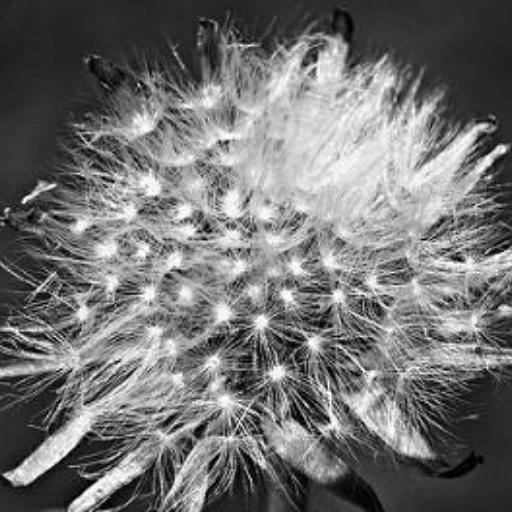

In [51]:
ima=os.path.join(test_dir,'0a98a2179.jpeg')
im = tf.keras.preprocessing.image.img_to_array(PIL.Image.open(ima))
im = tf.image.resize(im,size=(224,224))
im = tf.expand_dims(im,0)
PIL.Image.open(ima)

In [52]:
pred = model.predict(im)
pred_class = class_names[np.argmax(pred)]
conf = round(100*(np.argmax(pred)),2)
print("predicted label:",class_names[np.argmax(pred)])

1/1 [==============================] - 0s 71ms/step
predicted label: spear thistle
